<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Les marches aléatoires.

Avec l'aide de Frédéric Blanchard

https://iut-info.univ-reims.fr/users/coutant/TP1_GraphesIntro.html

Une puce se déplace de façon aléatoire sur une surface constituée de deux parties A et B. en assimilant la puce à un point, nous pouvons suivre en continu les déplacements de la puce.
Nous allons simplifier cette situation de deux façons : 

- La puce est dans la partie A : c’est l’état 1
- La puce est dans la partie B ; c’est l’état 2.

A l’instant initial t0, la puce est dans la partie A.

On dispose de deux informations : 

Si la puce est dans la partie A à l’instant i, la probabilité qu’elle soit dans la partie B à l’instant i+1 est 0,1.
Si la puce est dans la partie B, elle reste dans la partie B.


Lien vers graphviz : http://www.graphviz.org/


In [3]:
! pip install graphviz

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from dirmaths import *  # Programme mis au point par Frédéric Blanchard.
                 


Pour faire fonctionner ce programme, il faut installer : 
- networkx (avec pip)
- graphviz (avec pip)
- L'utilitaire Graphiviz en indiquant dans la variable d'environnement Path le chemin pour Graphiz/bin
- Avoir le fichier dirmaths.py dans le même répertoire



In [6]:
g=nx.DiGraph() # graphe orienté

g.add_edges_from([('A','A',{'weight':0.9}),('A','B',{'weight':0.1}),('B','B',{'weight':1})])


In [7]:
adj=nx.to_numpy_matrix(g)

G = {
    "matrice"     :  adj,
    "orientation" : True,
    "poids"       : True,
    "label"       : ['A','B'],
    "titre"       : "Marche aléatoire de la puce",
    "disposition" : "dot"
    
}

# Il y a trois dispositions : neato, circo et dot.

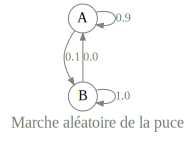

In [8]:
# La fonction didplay utilise le fichier dirmaths
display(G["matrice"],directed = G["orientation"],weighted=G["poids"],label = G["label"],title = G["titre"],dispo=G["disposition"])

<p>Image réalisée par graphviz directement </p>
<img src="marcheAlea.png">

In [8]:
T0=np.array([1,0]) # Etat initial


def Etatn(g,T0,n): # Fonction qui calcule l'état à l'instant n
    "Fonction qui calcule l'état à l'instant n"
    adj=nx.to_numpy_matrix(g)
    return(np.dot(T0,np.linalg.matrix_power(adj,n)))

# np.dot : produit des matrices
# linalg.matrix_power(adj,n) : matrice à la puissance n


In [9]:
# Recherche de la position de la puce à l'instant 3. Probabilités des états.

Etatn(g,T0,3) 

matrix([[0.729, 0.271]])

In [10]:
print(adj)

[[0.9 0.1]
 [0.  1. ]]


# Autres exemples 

<b>Exemple 2.</b><br/>
Un joueur a 1 Euro et veut posséder 3 Euros. Il joue au jeu de lancer de pièce suivant (supposé équi probable) : 
- Si pile sort, il récupère sa mise et gagne  1 Euro.
- Si face sort, il perd sa mise de 1 Euro
La partie s’arrête s’il perd son dernier Euro ou dés qu’il obtient 3 Euros.
Représenter cet exercice par un graphe probabiliste (les états correspondent au nombre d’Euros possédés).


<b>Exemple 3. </b><br />
Avant le début des travaux de construction d’une autoroute, une équipe d’archéologie préventive procède à des sondages successifs.
Lorsqu’un sondage donne lieu à la découverte de vestiges, il est dit positif ; dans la cas contraire il est dit négatif.
L’expérience acquise donne les informations suivantes : 
- Si un sondage est positif, le suivant a une probabilité égale à 0,6 d’être aussi positif.
- Si un sondage est négatif, le suivant a une probabilité égale à 0,9 d’être aussi négatif.
On suppose le premier sondage positif.

Représenter cet exemple par un graphe probabiliste.


<b>Exemple 4.</b><br/>
Dans un village, une nouvelle maladie contagieuse mais non mortelle fait son apparition.
Un individu peut être dans l’un des trois états suivants : 
- S : « Individu sain, non malade et non infecté »
- I : « Individu porteur sain, non malade mais infecté »
- M : « Individu malade et infecté »
A l’instant 0, on considère qu’une seule personne sur un échantillon de 100 est malade.


Les scientifiques ont découvert le scénario de développement suivant : 
	Pour les individus sains, la probabilité de devenir porteurs sains est égale à $\frac{1}{3}$ et la probabilité de devenir malades est égale à $\frac{1}{3}$.
	Pour les individus porteurs sains, la probabilité de devenir malade s est égale à $\frac{1}{2}$.

Représenter cet exemple par un graphe probabiliste.

